In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

def lineal(eq, individual):
    """
    Lineal fitness function:
        f(x1, x2, ..., xn) = w1·x1 + w2·x2^ + ... + wn·xn

    :param eq: equation to maximize
    :param individual: set of values applied to the equation to maximize it
    :return: dot product of each vector as number to maximize
    """
    return eq.dot(individual)


def polynomial(eq, individual):
    """
    Polynomial fitness function:
        f(x1, x2, ..., xn) = w1 + w2·x2^2 + w3·x3^3 + ... + wn·xn^n

    :param eq: equation weights to maximize
    :param individual: set of values applied to the equation to maximize it
    :return: result of f(x1, x2, ..., xn) = w1 + w2·x2^2 + w3·x3^3 + ... + wn·xn^n
    """
    res = 0
    for i, x in enumerate(individual):
        res += eq[i] * x**i
    return res

def GA(eq, population, fitness, iterations, mutate_prob=0.1, mutation_rate=1):
    """
    Genetic Algorithm from Russell & Norvig
    :param population: initial population. List of numpy vectors
    :param fitness: function to apply
    :param iterations: integer. Number of iterations
    :param mutate_prob: Probability of mutation. Float between 0.0 and 1.0
    :param mutation_rate: increment/decrement of the gene value
    :return: tuple (best individual found as numpy vector, max value found, history of bests)
    """
    history = [0]
    for i in range(iterations):
        #print("Iteration {}".format(i))
        new_population = []
        for p in population:
            x, y = random_selection(population, fitness, eq)
            child = reproduce(x, y)
            if random.random() <= mutate_prob:
                child = mutate(child, mutation_rate)
            new_population.append(child)
        best, best_value = best_of_generation(fitness, eq, population)
        history.append(best_value)
        population = new_population

    return best, best_value, history


def random_selection(population, fitness, eq):
    """
    Selection of the best two candidates given fitness function
    :param population: list of numpy array
    :param fitness: function to fit
    :param eq: params to fitness function
    :return: tuple of two more promising individuals (numpy vectors)
    """
    result = list(map(lambda x: (x, fitness(eq, x)), population))
    result.sort(key=lambda x: x[1], reverse=True)
    limit = int(len(population)/2)
    x = random.choice(result[:limit])[0]
    y = random.choice(result[:limit])[0]
    #return x, y
    return result[0][0], result[1][0]


def reproduce(x, y):
    """
    Given two individuals, make crossover
    :param x: numpy vector of genes
    :param y: numpy vector of genes
    :return: random crossover of x with y as numpy vector
    """
    n = len(x)
    pivot = random.randint(0, n - 1)
    return np.concatenate((x[0:pivot], y[pivot:n]))


def mutate(x, mutation_rate=1):
    """
    Mutate a random gene
    :param x: individual to mute (numpy vector)
    :param mutation_rate: increasing/decreasing factor
    :return: mutated x (numpy vector)
    """
    mut_gene = random.randint(1, len(x) - 2)
    x[mut_gene] += (mutation_rate if random.randint(0, 1) == 0 else -mutation_rate)
    return x


# Aux functions
def generate_population(items, length):
    """
    Generate a random population
    :param items: number of individuals (chromosomes) numpy vector
    :param length: length of each individual (number of genes) numpy vector
    :return: numpy array with
    """
    return np.random.rand(items, length)

def best_of_generation(fitness, eq, population):
    """
    Selects the best individual of its generation
    :param fitness: fitness function
    :param eq: equation to maximize
    :param population: list of individuals (numpy array)
    :return: tuple of numpy vector best individual and best value
    """
    best = fitness(eq, population[0])
    best_value = -9999999
    history = [0]
    for p in population:
        if fitness(eq, p) > best_value:
            best = p
            best_value = fitness(eq, p)
            history.append(best_value)
    return best, best_value

Best individual: [ 8.14611034e-01  1.06081756e+03  2.01848535e-01  1.26086096e+03
  1.00001944e+02 -1.09964473e+03  5.46754509e-01]
Best value: 1.2863297278811116e+16


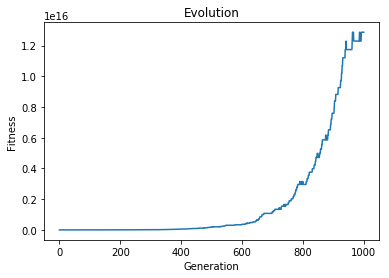

In [2]:
# Example
eq = np.array([2.5, 3.4, -1.9, 4.9, 0, -8, 1])
pop_limit = 10
pop_length = len(eq)
iterations = 1000
fitness = polynomial

indiv, value, history = GA(eq, generate_population(pop_limit,pop_length),
                           fitness, iterations, mutation_rate=10, mutate_prob=0.2)

print("Best individual: {}\nBest value: {}".format(indiv, value))

plt.plot(history)
plt.title("Evolution")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.savefig("results.png")
plt.show()


